# Pandas: Groupby

`groupby` is an amazingly powerful function in pandas. But it is also complicated to use and understand.
The point of this lesson is to make you feel confident in using `groupby` and its cousins, `resample` and `rolling`. 

These notes are loosely based on the [Pandas GroupBy Documentation](http://pandas.pydata.org/pandas-docs/stable/groupby.html).

The "split/apply/combine" concept was first introduced in a paper by Hadley Wickham: <https://www.jstatsoft.org/article/view/v040i01>.


Imports:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,7)
# %matplotlib inline
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


First we read the Earthquake data from our previous assignment:

In [2]:
df = pd.read_csv('../../assignments/data/query.csv', parse_dates=['time'], index_col='id')
df['country'] = df.place.str.split(', ').str[-1]
df_small = df[df.mag<4]
df = df[df.mag>4]
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country
id,,,,,,,,,,,,,,,,,,,,,
usc000swlj,2014-10-31 23:58:39.420000+00:00,-22.4417,-179.0532,442.29,4.1,mb,NaN,57.0,5.406,0.76,...,south of the Fiji Islands,earthquake,6.3,9.8,0.103,27.0,reviewed,us,us,south of the Fiji Islands
usc000sta3,2014-10-31 23:15:33.940000+00:00,40.3453,71.5875,10.00,4.4,mb,NaN,46.0,0.653,1.36,...,"10 km ESE of Oltiariq, Uzbekistan",earthquake,2.9,1.8,0.117,24.0,reviewed,us,us,Uzbekistan
usc000st9z,2014-10-31 23:00:04+00:00,45.1647,22.2912,4.10,4.1,mwr,NaN,74.0,0.410,1.00,...,"1 km NNE of Teregova, Romania",earthquake,3.1,1.7,0.053,34.0,reviewed,buc,us,Romania
usc000st9w,2014-10-31 22:45:19.200000+00:00,-4.5943,153.0138,66.11,4.8,mb,NaN,51.0,0.937,0.74,...,"87 km ESE of Kokopo, Papua New Guinea",earthquake,5.3,5.1,0.054,108.0,reviewed,us,us,Papua New Guinea
usc000st92,2014-10-31 21:32:26.100000+00:00,64.6210,-17.7770,10.40,5.0,mb,NaN,34.0,1.531,0.78,...,"119 km S of Akureyri, Iceland",earthquake,5.8,3.5,0.029,417.0,reviewed,us,us,Iceland


## An Example

This is an example of a "one-liner" that you can accomplish with groupby.

<Axes: xlabel='country'>

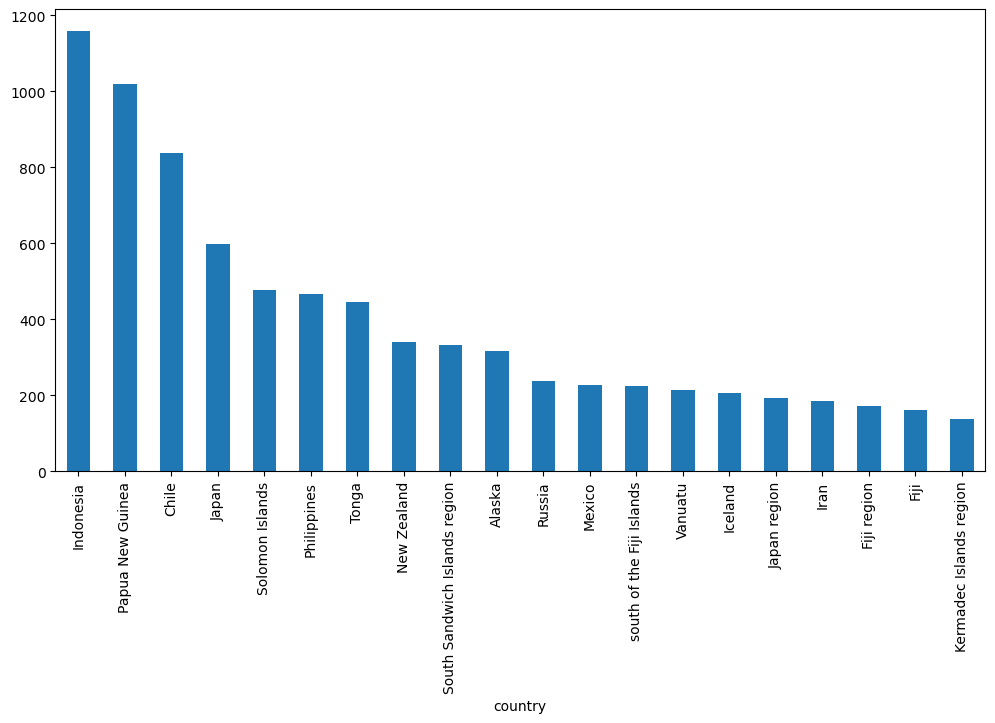

In [3]:
df.groupby('country').mag.count().nlargest(20).plot(kind='bar', figsize=(12,6))

<Axes: xlabel='country'>

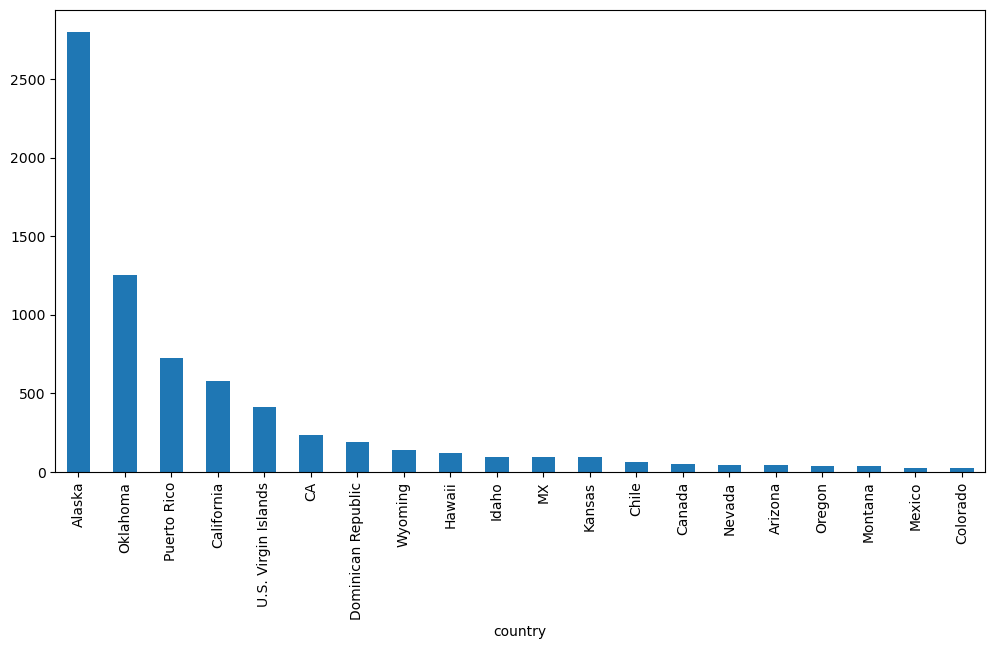

In [4]:
df_small.groupby('country').mag.count().nlargest(20).plot(kind='bar', figsize=(12,6))

## What Happened?

Let's break apart this operation a bit. The workflow with `groubpy` can be divided into three general steps:

1. **Split**: Partition the data into different groups based on some criterion.
1. **Apply**: Do some caclulation within each group. Different types of "apply" steps might be
  1. *Aggregation*: Get the mean or max within the group.
  1. *Transformation*: Normalize all the values within a group
  1. *Filtration*: Eliminate some groups based on a criterion.
1. **Combine**: Put the results back together into a single object.

![split-apply-combine](https://miro.medium.com/max/1840/1*JbF6nhrQsn4f-TaSF6IR9g.png)

### The `groupby` method

Both `Series` and `DataFrame` objects have a groupby method. It accepts a variety of arguments, but the simplest way to think about it is that you pass another series, whose unique values are used to split the original object into different groups.

via <https://medium.com/analytics-vidhya/split-apply-combine-strategy-for-data-mining-4fd6e2a0cc99>

In [5]:
df.groupby(df.country)

There is a shortcut for doing this with dataframes: you just pass the column name:

In [6]:
df.groupby('country')

### The `GroubBy` object

When we call, `groupby` we get back a `GroupBy` object:

In [7]:
gb = df.groupby('country')
gb

The length tells us how many groups were found:

In [8]:
len(gb)

267

All of the groups are available as a dictionary via the `.groups` attribute:

In [9]:
groups = gb.groups
len(groups)

267

In [10]:
list(groups.keys())

['Afghanistan',
 'Afghanistan-Tajikistan-Pakistan region',
 'Alaska',
 'Albania',
 'Algeria',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Arizona',
 'Ascension Island region',
 'Australia',
 'Azerbaijan',
 'Azores Islands region',
 'Azores-Cape St. Vincent Ridge',
 'Baffin Bay',
 'Balleny Islands region',
 'Banda Sea',
 'Bangladesh',
 'Bay of Bengal',
 'Beaufort Sea',
 'Bermuda',
 'Bismarck Sea',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Bouvet Island region',
 'Brazil',
 'Burundi',
 'CA',
 'California',
 'California Earthquake',
 'Canada',
 'Carlsberg Ridge',
 'Cayman Islands',
 'Celebes Sea',
 'Central Alaska',
 'Central Turkey',
 'Chagos Archipelago region',
 'Chile',
 'Chile-Bolivia border region',
 'China',
 'Colombia',
 'Colombia-Ecuador border region',
 'Comoros',
 'Costa Rica',
 'Crozet Islands region',
 'Cuba',
 'Cuba region',
 'Cyprus',
 "D'Entrecasteaux Islands region",
 'Davis Strait',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor region',
 'Easter I

### Iterating and selecting groups

You can loop through the groups if you want.

In [11]:
for key, group in gb:
    display(group.head())
    print(f'The key is "{key}"')
    break

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country
id,,,,,,,,,,,,,,,,,,,,,
usb000sr62,2014-10-28 18:52:11.630000+00:00,36.5171,71.3805,94.86,4.5,mb,NaN,74.0,0.886,1.10,...,"22 km SW of Ashk?sham, Afghanistan",earthquake,5.4,6.6,0.096,37.0,reviewed,us,us,Afghanistan
usb000sr0a,2014-10-28 00:54:22.490000+00:00,36.5401,70.9566,156.80,4.1,mb,NaN,76.0,0.659,0.88,...,"37 km SSE of Jurm, Afghanistan",earthquake,3.0,5.6,0.105,26.0,reviewed,us,us,Afghanistan
usb000sqa0,2014-10-24 09:52:48.730000+00:00,36.5657,71.1712,94.52,4.5,mb,NaN,71.0,0.735,1.47,...,"34 km WSW of Ashk?sham, Afghanistan",earthquake,6.1,6.2,0.111,25.0,reviewed,us,us,Afghanistan
usb000sq97,2014-10-24 03:17:05.650000+00:00,36.6557,71.1489,78.97,4.5,mb,NaN,70.0,0.656,1.25,...,"34 km W of Ashk?sham, Afghanistan",earthquake,5.3,5.7,0.136,28.0,reviewed,us,us,Afghanistan
usb000spi8,2014-10-21 17:35:25.340000+00:00,36.3417,70.5034,175.12,4.2,mb,NaN,75.0,0.784,0.86,...,"Hindu Kush region, Afghanistan",earthquake,7.7,8.2,0.132,18.0,reviewed,us,us,Afghanistan


The key is "Afghanistan"


And you can get a specific group by key.

In [12]:
gb.get_group('Chile').head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,country
id,,,,,,,,,,,,,,,,,,,,,
usb000srx7,2014-10-31 04:23:04+00:00,-34.5790,-71.0550,75.90,4.1,mb,NaN,NaN,NaN,0.61,...,"Libertador General Bernardo O'Higgins, Chile",earthquake,7.2,5.5,0.368,7.0,reviewed,guc,us,Chile
usb000srwp,2014-10-31 02:46:43+00:00,-19.3900,-69.1960,113.40,4.4,mwr,NaN,NaN,NaN,1.02,...,"135 km NE of Iquique, Chile",earthquake,6.4,4.2,0.055,32.0,reviewed,guc,us,Chile
usb000squ4,2014-10-27 06:07:23.410000+00:00,-34.5269,-73.4779,17.97,4.4,mb,NaN,100.0,1.362,0.94,...,"132 km NW of Constitución, Chile",earthquake,4.5,5.9,0.537,1.0,reviewed,us,us,Chile
usb000sqp0,2014-10-26 02:52:53+00:00,-20.5680,-70.5530,44.80,4.7,mb,NaN,NaN,NaN,1.26,...,"57 km SW of Iquique, Chile",earthquake,4.9,4.1,0.110,52.0,reviewed,guc,us,Chile
usc000sv1u,2014-10-25 20:21:47+00:00,-33.2970,-69.7940,8.10,4.1,mb,NaN,NaN,NaN,1.07,...,"75 km ENE of Villa Presidente Frei, Ñuñoa, San...",earthquake,3.8,4.3,0.261,5.0,reviewed,guc,us,Chile


## Aggregation

Now that we know how to create a `GroupBy` object, let's learn how to do aggregation on it.

One way us to use the `.aggregate` method, which accepts another function as its argument. The result is automatically combined into a new dataframe with the group key as the index.

In [13]:
gb.aggregate(np.max).head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2014-10-28 18:52:11.630000+00:00,37.5010,72.3338,248.39,5.6,mww,NaN,172.0,3.505,1.49,...,2022-07-27T04:48:31.126Z,"Hindu Kush region, Afghanistan",earthquake,10.0,12.4,0.384,236.0,reviewed,us,us
Afghanistan-Tajikistan-Pakistan region,2014-04-21 04:49:51.300000+00:00,36.2863,71.3573,98.93,4.3,mb,NaN,72.0,2.570,1.37,...,2014-07-04T01:34:48.000Z,Afghanistan-Tajikistan-Pakistan region,earthquake,NaN,5.8,0.096,31.0,reviewed,us,us
Alaska,2014-10-30 22:08:40.190000+00:00,68.0197,179.4190,234.20,7.9,mww,NaN,338.0,6.339,1.84,...,2024-01-17T21:08:44.760Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,14.8,22.2,0.381,621.0,reviewed,us,us
Albania,2014-05-20 04:43:25.500000+00:00,41.5297,20.2804,21.00,5.0,mwr,NaN,38.0,1.299,1.23,...,2022-07-26T15:14:53.291Z,"18 km WSW of Mamurras, Albania",earthquake,NaN,7.4,0.265,285.0,reviewed,us,us
Algeria,2014-08-22 00:22:46.420000+00:00,36.9391,5.6063,15.60,5.5,mww,NaN,174.0,3.250,1.26,...,2022-08-07T00:52:43.784Z,"24 km SSE of Mostaganem, Algeria",earthquake,3.8,6.2,0.526,15.0,reviewed,us,us


By default, the operation is applied to every column. That's usually not what we want. We can use both `.` or `[]` syntax to select a specific column to operate on. Then we get back a series.

In [14]:
gb.mag.aggregate(np.max).head()

country
Afghanistan                               5.6
Afghanistan-Tajikistan-Pakistan region    4.3
Alaska                                    7.9
Albania                                   5.0
Algeria                                   5.5
Name: mag, dtype: float64

In [15]:
gb.mag.aggregate(np.max).nlargest(10)

country
Chile                                    8.2
Alaska                                   7.9
Solomon Islands                          7.6
Papua New Guinea                         7.5
El Salvador                              7.3
Mexico                                   7.2
southern East Pacific Rise               7.0
Federated States of Micronesia region    6.9
Fiji region                              6.9
Greece                                   6.9
Name: mag, dtype: float64

There are shortcuts for common aggregation functions:

In [16]:
gb.mag.max().nlargest(10)

country
Chile                                    8.2
Alaska                                   7.9
Solomon Islands                          7.6
Papua New Guinea                         7.5
El Salvador                              7.3
Mexico                                   7.2
southern East Pacific Rise               7.0
Federated States of Micronesia region    6.9
Fiji region                              6.9
Greece                                   6.9
Name: mag, dtype: float64

In [17]:
gb.mag.min().nsmallest(10)

country
California             4.01
MX                     4.01
Afghanistan            4.10
Alaska                 4.10
Albania                4.10
Algeria                4.10
Antigua and Barbuda    4.10
Argentina              4.10
Australia              4.10
Banda Sea              4.10
Name: mag, dtype: float64

In [18]:
gb.mag.mean().nlargest(10)

country
California Earthquake             6.020000
Federated States of Micronesia    5.666667
Arizona                           5.300000
Easter Island region              5.162500
southern Iran                     5.100000
southern Peru                     5.100000
North Korea                       5.000000
South Georgia Island region       5.000000
northern Alaska                   5.000000
Bouvet Island region              4.985714
Name: mag, dtype: float64

In [19]:
gb.mag.std().nlargest(10)

country
northern Alaska                       1.131371
Federated States of Micronesia        0.929157
Bouvet Island region                  0.807111
California                            0.750920
South Indian Ocean                    0.708872
Oman                                  0.707107
southern East Pacific Rise            0.653818
Brazil                                0.636396
east of the South Sandwich Islands    0.624029
Wallis and Futuna                     0.616727
Name: mag, dtype: float64

We can also apply multiple functions at once:

In [20]:
gb.mag.aggregate([np.min, np.max, np.mean]).head()

,min,max,mean
country,,,
Afghanistan,4.1,5.6,4.387368
Afghanistan-Tajikistan-Pakistan region,4.3,4.3,4.300000
Alaska,4.1,7.9,4.544164
Albania,4.1,5.0,4.457143
Algeria,4.1,5.5,4.560000


<Axes: xlabel='country'>

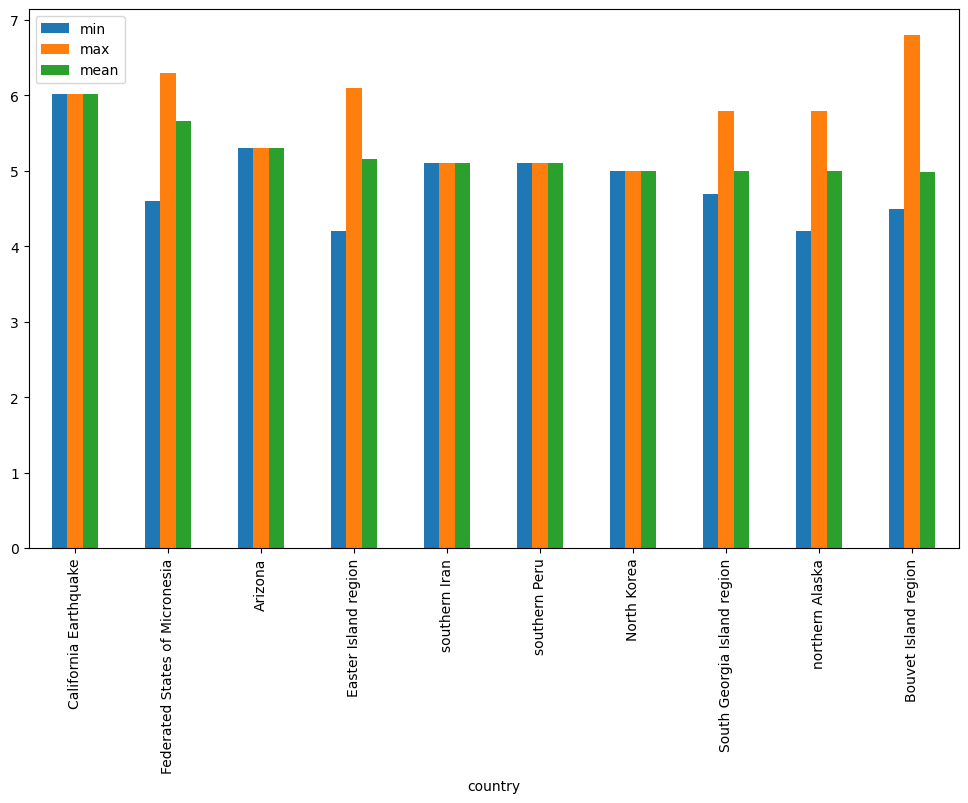

In [21]:
gb.mag.aggregate([np.min, np.max, np.mean]).nlargest(10, 'mean').plot(kind='bar')

## Transformation

The key difference between aggregation and transformation is that aggregation returns a *smaller* object than the original, indexed by the group keys, while *transformation* returns an object with the same index (and same size) as the original object. Groupby + transformation is used when applying an operation that requires information about the whole group.

In this example, we standardize the earthquakes in each country so that the distribution has zero mean and unit variance. We do this by first defining a function called `standardize` and then passing it to the `transform` method.

I admit that I don't know why you would want to do this. `transform` makes more sense to me in the context of time grouping operation. See below for another example.

In [22]:
def standardize(x):
    return (x - x.mean())/x.std()

mag_standardized_by_country = gb.mag.transform(standardize)
mag_standardized_by_country.head()

id
usc000swlj   -1.145807
usc000sta3   -0.651461
usc000st9z   -1.080123
usc000st9w    0.559124
usc000st92    1.012338
Name: mag, dtype: float64

## Time Grouping

We already saw how pandas has a strong built-in understanding of time. This capability is even more powerful in the context of `groupby`. With datasets indexed by a pandas `DateTimeIndex`, we can easily group and resample the data using common time units.

To get started, let's load the timeseries data we already explored in past lessons.

In [23]:
import urllib
import pandas as pd

header_url = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/HEADERS.txt'
with urllib.request.urlopen(header_url) as response:
    data = response.read().decode('utf-8')
lines = data.split('\n')
headers = lines[1].split(' ')

ftp_base = 'ftp://ftp.ncdc.noaa.gov/pub/data/uscrn/products/daily01/'
dframes = []
for year in range(2016, 2019):
    data_url = f'{year}/CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(ftp_base + data_url, parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df = df.drop(columns=["SUR_TEMP_DAILY_TYPE"])

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_62224/3171698157.py:15: SyntaxWarning: invalid escape sequence '\s'
  names=headers, header=None, sep='\s+',


In [24]:
df.head()

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY,
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,64756,2.422,-73.74,41.79,3.4,-0.5,1.5,1.3,0.0,1.69,...,0.233,0.204,0.155,0.147,4.2,4.4,5.1,6.0,7.6,NaN
2016-01-02,64756,2.422,-73.74,41.79,2.9,-3.6,-0.4,-0.3,0.0,6.25,...,0.227,0.199,0.152,0.144,2.8,3.1,4.2,5.7,7.4,NaN
2016-01-03,64756,2.422,-73.74,41.79,5.1,-1.8,1.6,1.1,0.0,5.69,...,0.223,0.196,0.151,0.141,2.6,2.8,3.8,5.2,7.2,NaN
2016-01-04,64756,2.422,-73.74,41.79,0.5,-14.4,-6.9,-7.5,0.0,9.17,...,0.220,0.194,0.148,0.139,1.7,2.1,3.4,4.9,6.9,NaN
2016-01-05,64756,2.422,-73.74,41.79,-5.2,-15.5,-10.3,-11.7,0.0,9.34,...,0.213,0.191,0.148,0.138,0.4,0.9,2.4,4.3,6.6,NaN


This timeseries has daily resolution, and the daily plots are somewhat noisy.

<Axes: xlabel='LST_DATE'>

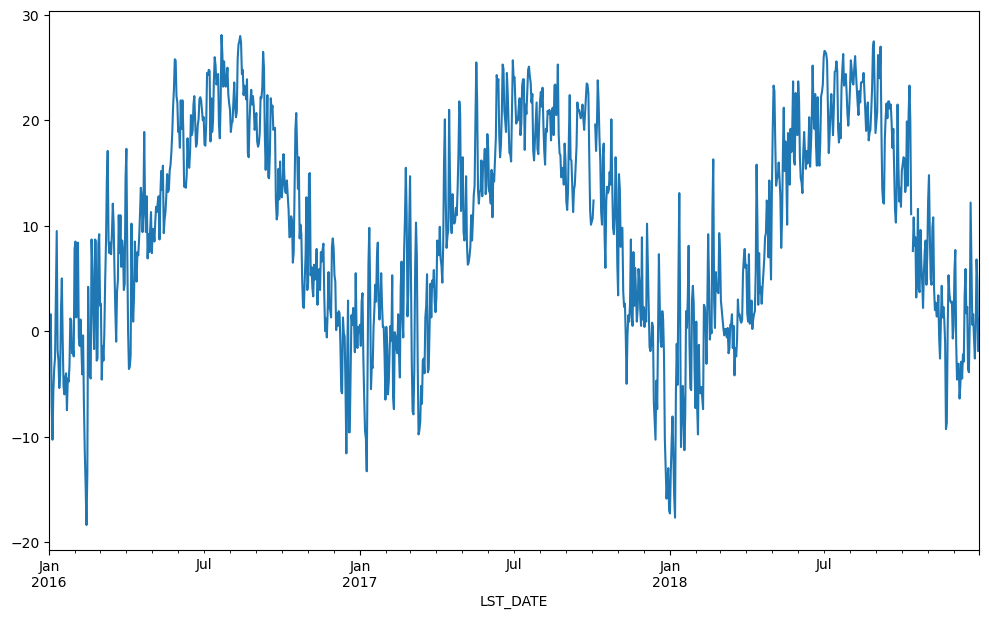

In [25]:
df.T_DAILY_MEAN.plot()

A common way to analyze such data in climate science is to create a "climatology," which contains the average values in each month or day of the year. We can do this easily with groupby. Recall that `df.index` is a pandas `DateTimeIndex` object.

In [26]:
monthly_climatology = df.groupby(df.index.month).mean()
monthly_climatology

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY,
LST_DATE,,,,,,,,,,,,,,,,,,,,,
1,64756.0,2.488667,-73.74,41.79,2.924731,-7.122581,-2.100000,-1.905376,2.478495,5.812258,...,0.240250,0.200698,0.153645,0.160859,0.150538,0.248387,0.788172,1.766667,3.364516,NaN
2,64756.0,2.487882,-73.74,41.79,6.431765,-5.015294,0.712941,1.022353,4.077647,8.495882,...,0.247714,0.210044,0.159153,0.163889,1.216471,1.169412,1.278824,1.617647,2.442353,NaN
3,64756.0,2.488667,-73.74,41.79,7.953763,-3.035484,2.455914,2.643011,2.788172,13.211290,...,0.228612,0.203634,0.157796,0.160366,3.450538,3.400000,3.372043,3.480645,3.777419,NaN
4,64756.0,2.488667,-73.74,41.79,14.793333,1.816667,8.302222,8.574444,2.396667,15.295889,...,0.214067,0.195844,0.153878,0.158100,9.415556,9.117778,8.455556,7.618889,6.670000,NaN
5,64756.0,2.488667,-73.74,41.79,21.235484,8.460215,14.850538,15.121505,3.015054,17.288602,...,0.204796,0.187097,0.148871,0.155720,16.934409,16.640860,15.612903,14.208602,12.455914,NaN
6,64756.0,2.488667,-73.74,41.79,25.627778,11.837778,18.733333,19.026667,3.053333,21.913333,...,0.136911,0.135211,0.129422,0.152711,22.403333,22.126667,20.956667,19.448889,17.552222,NaN
7,64756.0,2.488667,-73.74,41.79,28.568817,15.536559,22.054839,22.012903,3.865591,21.570645,...,0.105806,0.095204,0.114419,0.150000,25.448387,25.318280,24.163441,22.746237,21.068817,NaN
8,64756.0,2.488667,-73.74,41.79,27.473118,15.351613,21.410753,21.378495,4.480645,18.493333,...,0.156161,0.132333,0.128796,0.158750,24.758065,24.829032,24.116129,23.325806,22.301075,NaN
9,64756.0,2.488667,-73.74,41.79,24.084444,12.032222,18.057778,17.866667,3.730000,13.625667,...,0.136900,0.126422,0.121356,0.154000,21.028889,21.168889,20.921111,20.834444,20.707778,NaN


Each row in this new dataframe respresents the average values for the months (1=January, 2=February, etc.)

We can apply more customized aggregations, as with any groupby operation. Below we keep the mean of the mean, max of the max, and min of the min for the temperature measurements.

In [27]:
monthly_T_climatology = df.groupby(df.index.month).aggregate({'T_DAILY_MEAN': 'mean',
                                                              'T_DAILY_MAX': 'max',
                                                              'T_DAILY_MIN': 'min'})
monthly_T_climatology.head()

,T_DAILY_MEAN,T_DAILY_MAX,T_DAILY_MIN
LST_DATE,,,
1,-2.100000,16.9,-26.0
2,0.712941,24.9,-24.7
3,2.455914,26.8,-16.5
4,8.302222,30.6,-11.3
5,14.850538,33.4,-1.6


<Axes: xlabel='LST_DATE'>

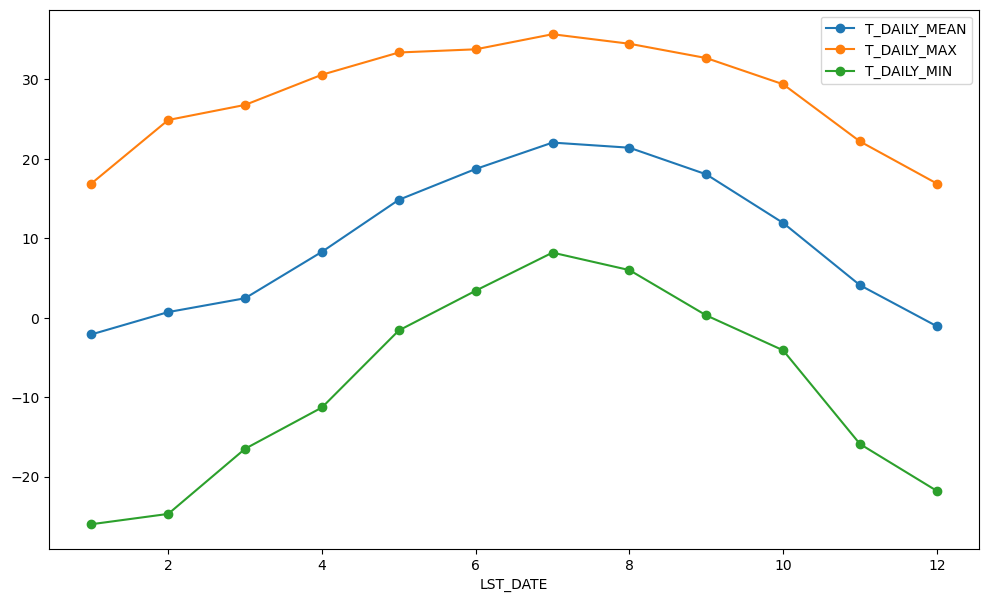

In [28]:
monthly_T_climatology.plot(marker='o')

If we want to do it on a finer scale, we can group by day of year.

<Axes: xlabel='LST_DATE'>

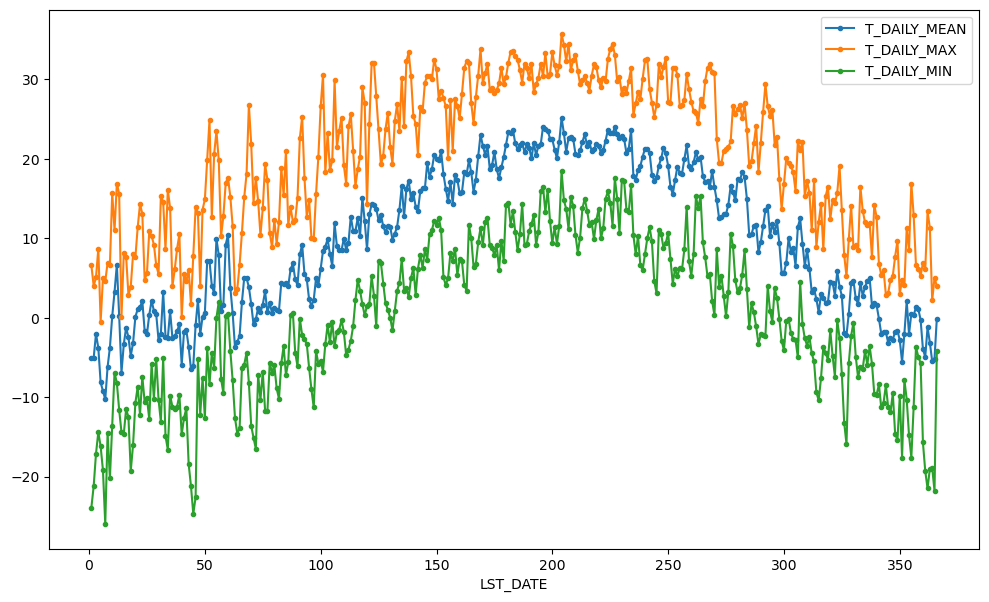

In [29]:
daily_T_climatology = df.groupby(df.index.dayofyear).aggregate({'T_DAILY_MEAN': 'mean',
                                                            'T_DAILY_MAX': 'max',
                                                            'T_DAILY_MIN': 'min'})
daily_T_climatology.plot(marker='.')

### Calculating anomalies

A common mode of analysis in climate science is to remove the climatology from a signal to focus only on the "anomaly" values. This can be accomplished with transformation.

<Axes: xlabel='LST_DATE'>

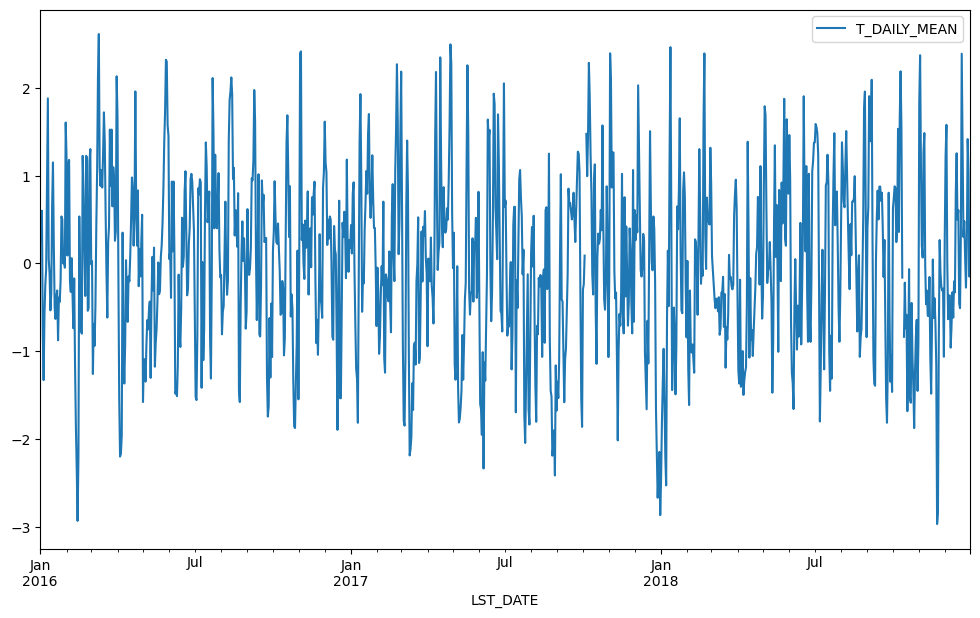

In [30]:
def standardize(x):
    return (x - x.mean())/x.std()

anomaly = df.groupby(df.index.month).transform(standardize)
anomaly.plot(y='T_DAILY_MEAN')

### Resampling

Another common operation is to change the resolution of a dataset by resampling in time. Pandas exposes this through the [resample](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#resampling) function. The resample periods are specified using pandas [offset index](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) syntax.

Below we resample the dataset by taking the mean over each month.

<Axes: xlabel='LST_DATE'>

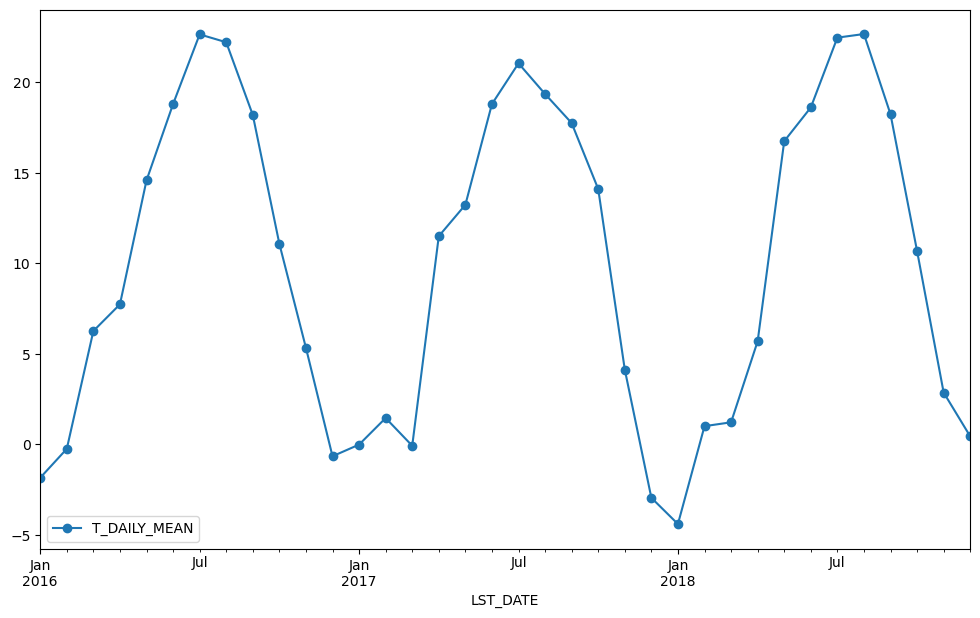

In [31]:
df.resample('M').mean().plot(y='T_DAILY_MEAN', marker='o')

Just like with `groupby`, we can apply any aggregation function to our `resample` operation.

<Axes: xlabel='LST_DATE'>

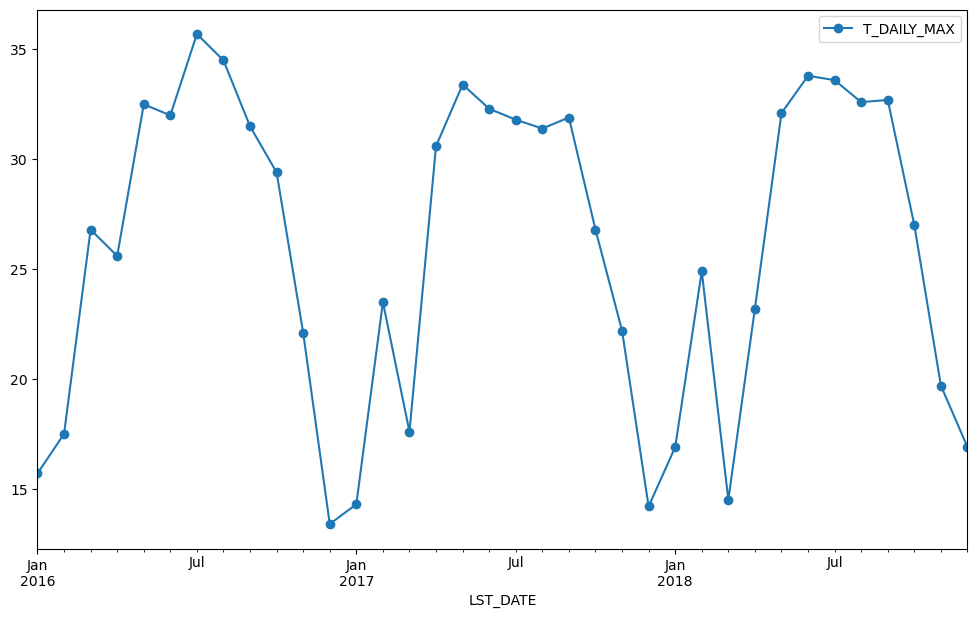

In [32]:
df.resample('M').max().plot(y='T_DAILY_MAX', marker='o')

### Rolling Operations

The final category of operations applies to "rolling windows". (See [rolling](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) documentation.) We specify a function to apply over a moving window along the index. We specify the size of the window and, optionally, the weights. We also use the keyword `centered` to tell pandas whether to center the operation around the midpoint of the window.

<Axes: xlabel='LST_DATE'>

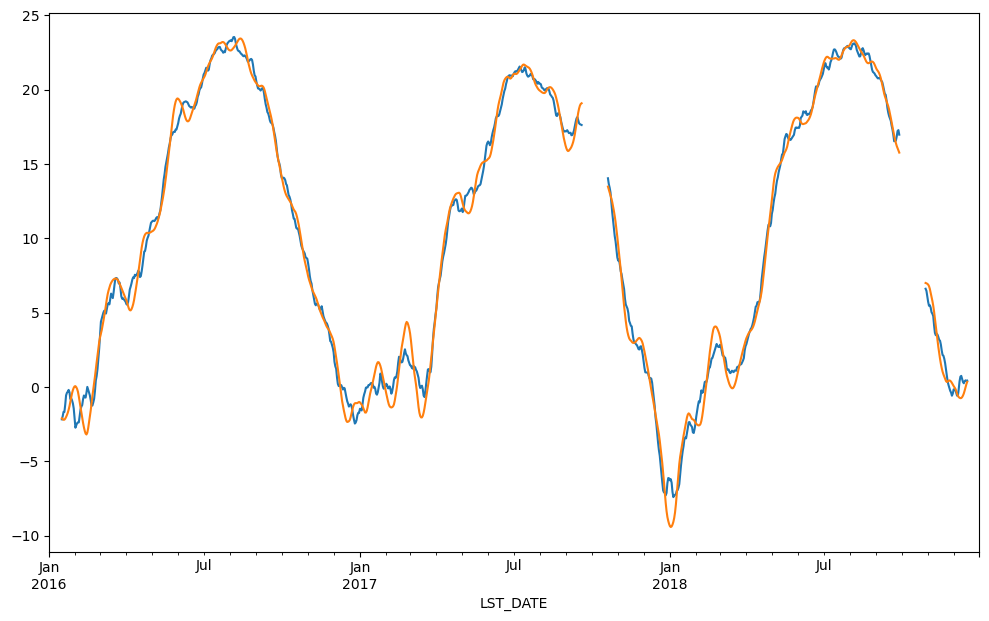

In [33]:
df.rolling(30, center=True).T_DAILY_MEAN.mean().plot()
df.rolling(30, center=True, win_type='triang').T_DAILY_MEAN.mean().plot()